# Introduction
In this project we will first play a game where we need to steer and apply thrust to the lander and avoid hitting the outside edge or the ground and safely put the lander on the target. I have attached the entire code in the 'Data Collection' folder(Data Collection code is not written by me). You just need to go main.py file and run it. There will an Data Collection button, click it and play. The data on how you are playing the game is collected and dumped in 'ce889_dataCollection' file. From here, our actual project starts where I will build a neural network from scratch and train it. Finally, we will check if the lander is safely landing on the target or not. 

Hope you enjoy this fun project

#### Note:
Please collect a large sample of dataset for training the Neural Network.
<img src="Rocket_Lander_image.PNG" width= "300">

### Data pre-processing

In [1]:
#importing required libraries

# for reading the data
import pandas as pd 

# for matrix multiplications during forward and backward propagations
import numpy as np   

#for plotting the error plot
import matplotlib.pyplot as plt 

#for splitting the data into train and test
from sklearn.model_selection import train_test_split 

 #for divisions
import math     


In [2]:
#reading the data file

df = pd.read_csv(r'C:\Users\yaswa\Desktop\Projects\DataScience\Rocket Landing Neural Netwotk\Data Collection\ce889_dataCollection.csv',header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.107703,0.04,0.1,0.0,46.516521,287.9,219.9,0,0.2,0.0,0,0
1,0.200000,0.00,0.2,0.0,46.516521,287.7,219.7,0,0.3,0.0,0,0
2,0.302655,0.04,0.3,0.0,46.476521,287.4,219.4,0,0.4,0.0,0,0
3,0.400000,0.00,0.4,0.0,46.476521,287.0,219.0,0,0.5,0.0,0,0
4,0.501597,0.04,0.5,0.0,46.436521,286.5,218.5,0,0.6,0.0,0,0


In [3]:
#for dropping the duplicates
df.drop_duplicates(inplace = True) 

In [4]:
#checking for null values
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [5]:
## Giving column names
df.columns = ["Current Speed", "Velocity X", "Velocity Y", "Current Angle", "X distance to target", 
              "Y distance to target", "Distance to ground","Thrust","New Vel Y", "New Angle",
              "Left Turning", "Right Turning"]
df.head()

,Current Speed,Velocity X,Velocity Y,Current Angle,X distance to target,Y distance to target,Distance to ground,Thrust,New Vel Y,New Angle,Left Turning,Right Turning
0,0.107703,0.04,0.1,0.0,46.516521,287.9,219.9,0,0.2,0.0,0,0
1,0.200000,0.00,0.2,0.0,46.516521,287.7,219.7,0,0.3,0.0,0,0
2,0.302655,0.04,0.3,0.0,46.476521,287.4,219.4,0,0.4,0.0,0,0
3,0.400000,0.00,0.4,0.0,46.476521,287.0,219.0,0,0.5,0.0,0,0
4,0.501597,0.04,0.5,0.0,46.436521,286.5,218.5,0,0.6,0.0,0,0


In [6]:
#Dropping the outputs that are not required
df.drop(columns = ["New Vel Y"], axis = 1,inplace= True)

In [7]:
#normalization
data_min = df.min()
data_max = df.max()
normalizeddata = (df - df.min()) / (df.max() - df.min())
normalizeddata.head()

,Current Speed,Velocity X,Velocity Y,Current Angle,X distance to target,Y distance to target,Distance to ground,Thrust,New Angle,Left Turning,Right Turning
0,0.013622,0.517070,0.419171,0.0,0.558572,0.375163,0.375163,0.0,0.0,0.0,0.0
1,0.025295,0.513674,0.426612,0.0,0.558572,0.374826,0.374826,0.0,0.0,0.0,0.0
2,0.038279,0.517070,0.434052,0.0,0.558533,0.374321,0.374321,0.0,0.0,0.0,0.0
3,0.050591,0.513674,0.441493,0.0,0.558533,0.373648,0.373648,0.0,0.0,0.0,0.0
4,0.063440,0.517070,0.448933,0.0,0.558493,0.372806,0.372806,0.0,0.0,0.0,0.0


In [8]:
#describing the data
normalizeddata.describe()

,Current Speed,Velocity X,Velocity Y,Current Angle,X distance to target,Y distance to target,Distance to ground,Thrust,New Angle,Left Turning,Right Turning
count,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000,23557.000000
mean,0.240226,0.514331,0.448795,0.364627,0.526340,0.396344,0.397013,0.508257,0.365442,0.061977,0.062062
std,0.169439,0.112088,0.137423,0.440002,0.135569,0.194617,0.194738,0.499942,0.440186,0.241119,0.241274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.106278,0.508686,0.350400,0.011236,0.488921,0.263285,0.263848,0.000000,0.011236,0.000000,0.000000
50%,0.209195,0.513674,0.442679,0.067416,0.530218,0.394521,0.395346,1.000000,0.067416,0.000000,0.000000
75%,0.342294,0.517070,0.539515,0.932584,0.563913,0.527232,0.528257,1.000000,0.932584,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#spliting data into training and testing
training , testing= train_test_split(normalizeddata, test_size = 0.2)
print(training.shape)
print(testing.shape)

(18845, 11)
(4712, 11)


In [10]:
#Splitting inputs & outputs for training, validation & testing data
x_train_input = np.array(training[["Current Speed", "Velocity X", "Velocity Y", "Current Angle", "X distance to target", 
              "Y distance to target", "Distance to ground"]]).T
y_train_output = np.array(training[["Thrust","New Angle","Left Turning", "Right Turning"]]).T

x_testing_input = np.array(testing[["Current Speed", "Velocity X", "Velocity Y", "Current Angle", "X distance to target", 
              "Y distance to target", "Distance to ground"]]).T
y_testing_output = np.array(testing[["Thrust","New Angle","Left Turning", "Right Turning"]]).T

### Model Building

In [11]:
#Defining Sigmoid Function
def sigmoid(x):  
    return 1/(1+np.exp(-x*0.1))
def sigmoid_derivative(x):  
    return x*(1-x)

In [12]:
#Forward Propagation
def fwd_propagation(x_fwd_input, model):
    
    Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
    
    z1 = np.dot(Weight_hidden, x_fwd_input) +bias_hidden
    a1 = sigmoid(z1)     #activation layer
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2)
    return(a2)   

In [13]:
#Backward Propagation

def back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, epsilon):
    Weight_hidden, bias_hidden, Weight_output, bias_output, dWeight_hidden_old, dWeight_output_old = model['w1'], model['b1'], model['w2'], model['b2'], model['dw1_old'], model['dw2_old']
    
    delta2 = r_lambda *(error * sigmoid_derivative(a2))
    a1 = sigmoid(np.dot(Weight_hidden, x_train_input) +bias_hidden)  
    delta1 = r_lambda * np.dot(Weight_output.T, delta2)*sigmoid_derivative(a1)
      
    dWeight_output = np.dot(delta2, a1.T)
    dWeight_hidden = np.dot(delta1, x_train_input.T)
    dbias_output = np.sum(delta2, axis=1, keepdims=True)
    dbias_hidden = np.sum(delta1, axis=1, keepdims=True)
    
        
    # update the weights with the derivative (slope) of the loss function
    Weight_hidden += l_rate*dWeight_hidden + epsilon * dWeight_hidden_old
    Weight_output += l_rate*dWeight_output + epsilon * dWeight_output_old
    bias_hidden += l_rate*dbias_hidden
    bias_output += l_rate*dbias_output
    # Assign new parameters to the model
    model = { 'w1': Weight_hidden, 'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden, "dw2_old": dWeight_output}
    return model

In [14]:
#Build the model
def build_model(x_train_input, y_train_output,n_hidden, r_lambda, l_rate, epsilon, epochs):
    
    #initialize parameters to random values
    Weight_hidden = np.random.rand(n_hidden,7) 
    bias_hidden = np.zeros((n_hidden,1))
    Weight_output = np.random.rand(4,n_hidden) 
    bias_output = np.zeros((4,1))
    
    #gradient momentum initilizations
    dWeight_hidden_old = np.zeros((n_hidden,7))
    dWeight_output_old = np.zeros((4,n_hidden))
    
    #Declaring dictonary for storing parameters for later use
    model = {}
    
    # Assign new parameters to the model
    model = { 'w1': Weight_hidden, 'b1': bias_hidden, 'w2': Weight_output, 'b2': bias_output, "dw1_old":dWeight_hidden_old, "dw2_old": dWeight_output_old}
    
    training_loss= []

    for i in range(0, epochs):
        
        #forward propagation
        a2 = fwd_propagation(x_train_input, model)
        error = 2*(y_train_output - a2)
        
        #backward propagation
        model = back_propagation(model,x_train_input, a2, error, r_lambda, l_rate, epsilon)
                
        rmserror  = calculate_loss(model, x_train_input, y_train_output)

        training_loss.append(rmserror)
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if i % 300 == 0:
            print("Loss after iteration %i: training loss = %f  " %(i,rmserror))
     
    return model, training_loss

In [15]:
#calculating loss
def calculate_loss(model, x_trainloss, y_trainloss):
    #calling model prediction
    Weight_hidden, bias_hidden, Weight_output, bias_output = model['w1'], model['b1'], model['w2'], model['b2']
    z1 = np.dot(Weight_hidden, x_trainloss) +bias_hidden
    a1 = sigmoid(z1)  #activation layer
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2) 
    rmserror = np.mean(np.square(y_trainloss - a2))
    z2 = np.dot(Weight_output, a1) + bias_output
    a2 = sigmoid(z2)
    return rmserror

### Hyper parameter Tuning

In [16]:
# Giving the hyperparameters and training the model
model, training_loss = build_model(x_train_input, y_train_output,n_hidden= 10, epochs = 1501, epsilon=0.1, r_lambda = 0.1, l_rate=0.1)

Loss after iteration 0: training loss = 0.217050  
Loss after iteration 300: training loss = 0.101925  
Loss after iteration 600: training loss = 0.099671  
Loss after iteration 900: training loss = 0.097570  
Loss after iteration 1200: training loss = 0.096804  
Loss after iteration 1500: training loss = 0.096269  


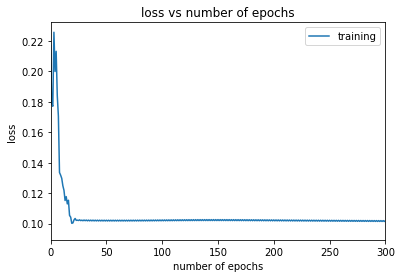

In [17]:
#plotting the loss vs number of epochs graph

def plot_erros(training_loss):
    plt.plot(training_loss)
    plt.xlabel('number of epochs')
    plt.ylabel('loss')
    plt.title('loss vs number of epochs')
    plt.legend(['training'], loc='upper right')
    plt.xlim(0, 300)
    plt.show()
plot_erros(training_loss)

In [18]:
# Got Weights and Biases
print(model["w1"],model["w2"],model["b1"],model["b2"])

[[  7.71604059  -7.64459086 -32.12326655 -12.88452599 -38.12680086
   -8.05594438  -8.34052674]
 [ -1.13852341  -6.2903219  -26.65486743 -15.21350046 -21.02402402
   -6.84066886  -7.35980315]
 [ 13.7857945   -8.19552195 -32.74457676 -13.78135151 -49.93229426
   -8.98776077  -8.41861362]
 [ -3.40538416  -4.69520628 -25.58048055 -15.19484883 -15.218103
   -6.90635233  -6.97745407]
 [-20.57406909  -5.22030453   6.80158003 -18.21156231  17.40354528
  -10.926704   -11.53777834]
 [  1.2060223   -6.972389   -30.46088865 -13.36031246 -25.17412027
   -7.91152476  -7.40279208]
 [ 12.55876399  -1.75519854  12.30167036 -67.91383234  -4.38460397
   12.44117973  12.01743218]
 [ -2.01897769   3.28235025  10.78712133 -38.42324354   5.67581479
   -1.54451801  -2.29270134]
 [ -7.66910141  -0.39647074 -13.57624842 -19.9710499   -3.35333499
   -6.87016574  -6.01771245]
 [-33.71838741 -37.72989099   7.5024069   23.3100645  -24.94974112
   43.99783182  43.27278425]] [[ 25.34508075  11.14006228  32.74283882 

In [19]:
# Predicting the test dataset outputs
y_prediction = fwd_propagation(x_testing_input, model)
y_prediction_df = pd.DataFrame(y_prediction.T,columns=["Thrust","New Angle","Left Turning", "Right Turning"])
y_prediction_df.head()

,Thrust,New Angle,Left Turning,Right Turning
0,0.702902,0.950098,0.181504,0.088982
1,0.528555,0.957052,0.090261,0.104471
2,0.540710,0.023065,0.000053,0.000044
3,0.679856,0.043966,0.000045,0.000061
4,0.696057,0.945997,0.182974,0.083776


In [20]:
#denormalize predicted data
y_prediction_df['Thrust'] = data_min['Thrust'] + y_prediction_df['Thrust']*(data_max['Thrust'] - data_min['Thrust']) 
y_prediction_df['New Angle'] = data_min['New Angle'] + y_prediction_df['New Angle']*(data_max['New Angle'] - data_min['New Angle'])
y_prediction_df['Left Turning'] = data_min['Left Turning'] + y_prediction_df['Left Turning']*(data_max['Left Turning'] - data_min['Left Turning']) 
y_prediction_df['Right Turning'] = data_min['Right Turning'] + y_prediction_df['Right Turning']*(data_max['Right Turning'] - data_min['Right Turning']) 

In [21]:
y_prediction_df.describe()

,Thrust,New Angle,Left Turning,Right Turning
count,4712.000000,4712.000000,4712.000000,4712.000000
mean,0.653158,131.211396,0.030436,0.025327
std,0.116682,152.516918,0.057824,0.036196
min,0.198643,4.205578,0.000002,0.000002
25%,0.619244,10.312770,0.000021,0.000033
50%,0.683491,23.214447,0.000066,0.000074
75%,0.720441,331.970424,0.041130,0.057494
max,0.933950,344.287140,0.372847,0.151014


In [22]:
#if the Left Turning is less than median then 0 or else 1
new_y_prediction_df1= []
for i in y_prediction_df['Left Turning']:
    if i< y_prediction_df['Left Turning'].median():
        x = 0
    else:
        x = 1
    new_y_prediction_df1.append(x)

In [23]:
#if the Right Turning is less than median then 0 or else 1
new_y_prediction_df2= []
for i in y_prediction_df['Right Turning']:
    if i< y_prediction_df['Right Turning'].median():
        x = 0
    else:
        x = 1
    new_y_prediction_df2.append(x)

In [24]:
#if the thrust is less than median then 0 or else 1
new_y_prediction_df3= []
for i in y_prediction_df['Thrust']:
    if i< y_prediction_df['Thrust'].median():
        x = 0
    else:
        x = 1
    new_y_prediction_df3.append(x)

In [25]:
Thrust_Output = pd.DataFrame(new_y_prediction_df3,columns=["Thrust"])
Thrust_Output

,Thrust
0,1
1,0
2,0
3,0
4,1
...,...
4707,1
4708,1
4709,1
4710,1


In [26]:
Right_Turning = pd.DataFrame(new_y_prediction_df2,columns=["Right_Turning"])
Right_Turning

,Right_Turning
0,1
1,1
2,0
3,0
4,1
...,...
4707,0
4708,0
4709,1
4710,0


In [27]:
Left_Turning = pd.DataFrame(new_y_prediction_df1,columns=["Left_Turning"])
Left_Turning

,Left_Turning
0,1
1,1
2,0
3,0
4,1
...,...
4707,0
4708,0
4709,1
4710,0


In [28]:
#y_prediction_df.drop(columns=['Thrust','Left Turning','Right Turning'],inplace = True)

In [29]:
#Final_Output = pd.concat([Thrust_Output,Left_Turning,Right_Turning,y_prediction_df ], axis=1)

In [30]:
#Final_Output

In [31]:
#y_prediction_df

In [32]:
# Finding RMSerror for normalized data
#rmserror_test = np.mean(np.square( (y_testing_output.T) - y_prediction_df))
#rmserror_test